```
티머니 홈페이지(https://www.t-money.co.kr/)에서 이용안내 선택 > 대중교통 통계자료 선택 > 최근 월간 교통카드 통계자료 게시글에서 엑셀 첨부 파일 다운로드합니ㅏㄷ.
'버스정류장별 이용현황', '지하철 노서별 역별 이용현황', '지하철 유무임별 이용현황', '지하철 시간대별 이용현황' 4개의 탭 확인

1. 지하철 시간대별 이용 현황 데이터 시각화
2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기
3. 밤 11시에 가장 많이 타는 역 찾기
```

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
fm.get_fontconfig_fonts()
font_location = 'data/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
rc('font', family=font_name)


In [409]:
df = pd.read_excel('./data/2019년_11월_ 교통카드_통계자료 - 복사본.xls', sheet_name='지하철 시간대별 이용현황', header=None) # 지하철 시간대별 이용현황,
df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,NaN,05:00:00~05:59:59,NaN,06:00:00~06:59:59,NaN,...,NaN,00:00:00~00:59:59,NaN,01:00:00~01:59:59,NaN,02:00:00~02:59:59,NaN,03:00:00~03:59:59,NaN,작업일시
1,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
2,2019-11,1호선,0150,서울역,1019,26,11590,9390,14391,57182,...,20872,3959,7479,2,416,0,0,0,0,2019-12-03 11:43:20
3,2019-11,1호선,0151,시청,78,2,2305,4294,3912,23460,...,4414,917,1419,1,38,0,0,0,0,2019-12-03 11:43:20
4,2019-11,1호선,0152,종각,99,0,4307,4647,4480,26687,...,5781,3847,1616,0,10,0,0,0,0,2019-12-03 11:43:20


In [410]:
# NaN 값 앞에 값으로 채우기
df = df.fillna(method='ffill', axis=1)
print(df.shape)

(599, 53)


In [411]:
df.iloc[0,4:52] = df.iloc[0,4:52] + df.iloc[1,4:52]
df.columns = df.iloc[0,:]
df.drop([0,1],inplace=True)

In [412]:
# 불필요 항목 삭제
df.drop(['역ID','작업일시'], axis=1, inplace=True)
print(df.columns)

Index(['사용월', '호선명', '지하철역', '04:00:00~04:59:59승차', '04:00:00~04:59:59하차',
       '05:00:00~05:59:59승차', '05:00:00~05:59:59하차', '06:00:00~06:59:59승차',
       '06:00:00~06:59:59하차', '07:00:00~07:59:59승차', '07:00:00~07:59:59하차',
       '08:00:00~08:59:59승차', '08:00:00~08:59:59하차', '09:00:00~09:59:59승차',
       '09:00:00~09:59:59하차', '10:00:00~10:59:59승차', '10:00:00~10:59:59하차',
       '11:00:00~11:59:59승차', '11:00:00~11:59:59하차', '12:00:00~12:59:59승차',
       '12:00:00~12:59:59하차', '13:00:00~13:59:59승차', '13:00:00~13:59:59하차',
       '14:00:00~14:59:59승차', '14:00:00~14:59:59하차', '15:00:00~15:59:59승차',
       '15:00:00~15:59:59하차', '16:00:00~16:59:59승차', '16:00:00~16:59:59하차',
       '17:00:00~17:59:59승차', '17:00:00~17:59:59하차', '18:00:00~18:59:59승차',
       '18:00:00~18:59:59하차', '19:00:00~19:59:59승차', '19:00:00~19:59:59하차',
       '20:00:00~20:59:59승차', '20:00:00~20:59:59하차', '21:00:00~21:59:59승차',
       '21:00:00~21:59:59하차', '22:00:00~22:59:59승차', '22:00:00~22:59:59하차',
       '23:00

In [413]:
df.reset_index(drop=True, inplace=True)
df

,사용월,호선명,지하철역,04:00:00~04:59:59승차,04:00:00~04:59:59하차,05:00:00~05:59:59승차,05:00:00~05:59:59하차,06:00:00~06:59:59승차,06:00:00~06:59:59하차,07:00:00~07:59:59승차,...,23:00:00~23:59:59승차,23:00:00~23:59:59하차,00:00:00~00:59:59승차,00:00:00~00:59:59하차,01:00:00~01:59:59승차,01:00:00~01:59:59하차,02:00:00~02:59:59승차,02:00:00~02:59:59하차,03:00:00~03:59:59승차,03:00:00~03:59:59하차
0,2019-11,1호선,서울역,1019,26,11590,9390,14391,57182,42971,...,34270,20872,3959,7479,2,416,0,0,0,0
1,2019-11,1호선,시청,78,2,2305,4294,3912,23460,8160,...,14929,4414,917,1419,1,38,0,0,0,0
2,2019-11,1호선,종각,99,0,4307,4647,4480,26687,7318,...,45860,5781,3847,1616,0,10,0,0,0,0
3,2019-11,1호선,종로3가,187,10,5307,2998,4617,14703,6657,...,26081,6152,3031,2757,6,51,0,0,0,0
4,2019-11,1호선,종로5가,39,0,2195,3809,3118,16262,5783,...,10796,3768,827,1119,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2019-11,우이신설선,북한산보국문,5,0,1976,729,6690,2479,21656,...,1898,7170,547,2033,0,0,0,0,0,0
593,2019-11,우이신설선,정릉,3,0,1871,722,5183,1894,14377,...,1092,3487,364,1042,0,0,0,0,0,0
594,2019-11,우이신설선,성신여대입구(돈암),6,1,831,305,1165,1298,4064,...,3510,2263,740,778,0,0,0,0,0,0
595,2019-11,우이신설선,보문,8,4,333,115,801,895,2318,...,623,1249,156,397,2,7,0,0,0,0


Text(0, 0.5, '이용자 수 ')

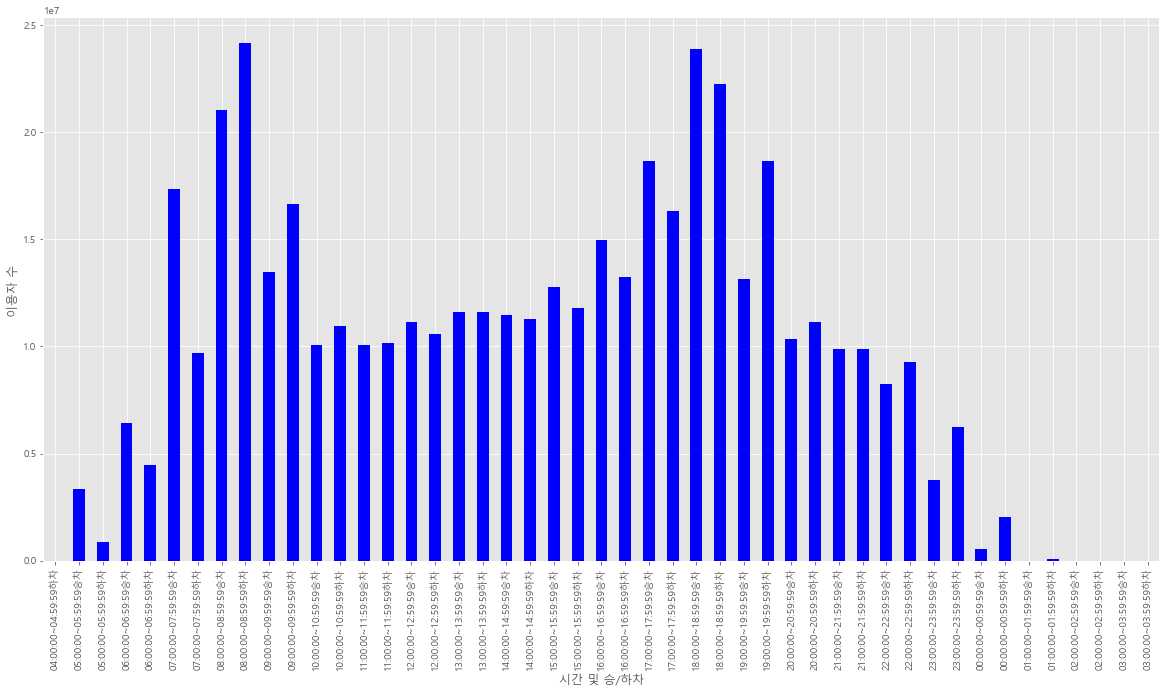

In [414]:
#1. 지하철 시간대별 이용 현황 데이터 시각화
useage_list = df.iloc[:,4:].sum()
useage_list

#그래프 서식 지정
plt.style.use('ggplot')


#
useage_list.plot(kind='bar', color='blue', figsize=(20,10))

plt.xlabel('시간 및 승/하차')
plt.ylabel('이용자 수 ')


In [415]:
# 2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기
# 많이 타는 역 찾기
sumof_list = df['07:00:00~07:59:59승차'] + df['08:00:00~08:59:59승차']
sumof_list = sumof_list.astype(int)
print("출근 시간대 (7시 ~9시)  많이 타는 역 : ",df.loc[sumof_list.idxmax() ,'지하철역'])

#많이 내리는 역 찾기
sumof_list2 = df['07:00:00~07:59:59하차'] + df['08:00:00~08:59:59하차']
sumof_list2 = sumof_list2.astype(int)
print("출근 시간대 (7시 ~9시)  많이 내리는 역 : ",df.loc[sumof_list2.idxmax() ,'지하철역'])


출근 시간대 (7시 ~9시)  많이 타는 역 :  신림
출근 시간대 (7시 ~9시)  많이 내리는 역 :  강남


In [416]:
#3. 밤 11시에 가장 많이 타는 역 찾기
many_of_list = df['23:00:00~23:59:59승차']
many_of_list = many_of_list.astype(int)
print("밤 11시에 많이 타는 역 : ",df.loc[many_of_list.idxmax() ,'지하철역'])


밤 11시에 많이 타는 역 :  홍대입구


```
4. titanic data set 을 decision tree로 분류 분석하시오
X = ndf[ ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
Y = ndf['survived']
```

In [417]:
import seaborn as sns

In [436]:
df = sns.load_dataset('titanic')
print(df.info())
df.drop(['fare','class','who','adult_male','deck','embark_town','alive','alone'],axis=1 ,inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [437]:
# age 컬럼의 결측치 제거
df.dropna(subset=['age'], axis=0 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
survived    714 non-null int64
pclass      714 non-null int64
sex         714 non-null object
age         714 non-null float64
sibsp       714 non-null int64
parch       714 non-null int64
embarked    712 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [438]:
# embarked 컬럼의 결측치 제거
print(df['embarked'].unique())
df.dropna(subset=['embarked'], axis=0 , inplace=True)
df.info()

['S' 'C' 'Q' nan]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
survived    712 non-null int64
pclass      712 non-null int64
sex         712 non-null object
age         712 non-null float64
sibsp       712 non-null int64
parch       712 non-null int64
embarked    712 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [439]:
#object 값들 int로 변경
df['sex'].replace({'male':1 , 'female':0}, inplace=True)
df['embarked'].replace({'S':1 , 'C':0, 'Q':2  }, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,1
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,1
3,1,1,0,35.0,1,0,1
4,0,3,1,35.0,0,0,1
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,2
886,0,2,1,27.0,0,0,1
887,1,1,0,19.0,0,0,1
889,1,1,1,26.0,0,0,0


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
survived    712 non-null int64
pclass      712 non-null int64
sex         712 non-null int64
age         712 non-null float64
sibsp       712 non-null int64
parch       712 non-null int64
embarked    712 non-null int64
dtypes: float64(1), int64(6)
memory usage: 44.5 KB


In [443]:
#변수 설정

#독립변수
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(X)


#종속변수
Y = df['survived']

     pclass  sex   age  sibsp  parch  embarked
0         3    1  22.0      1      0         1
1         1    0  38.0      1      0         0
2         3    0  26.0      0      0         1
3         1    0  35.0      1      0         1
4         3    1  35.0      0      0         1
..      ...  ...   ...    ...    ...       ...
885       3    0  39.0      0      5         2
886       2    1  27.0      0      0         1
887       1    0  19.0      0      0         1
889       1    1  26.0      0      0         0
890       3    1  32.0      0      0         2

[712 rows x 6 columns]


In [444]:
# 설명변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 0.90859974  0.75613751 -0.52766856  0.52251079 -0.50678737  0.31923045]
 [-1.48298257 -1.32251077  0.57709388  0.52251079 -0.50678737 -1.9091233 ]
 [ 0.90859974 -1.32251077 -0.25147795 -0.55271372 -0.50678737  0.31923045]
 ...
 [-1.48298257 -1.32251077 -0.73481151 -0.55271372 -0.50678737  0.31923045]
 [-1.48298257  0.75613751 -0.25147795 -0.55271372 -0.50678737 -1.9091233 ]
 [ 0.90859974  0.75613751  0.16280796 -0.55271372 -0.50678737  2.54758421]]


In [445]:
#train/test set 7:3으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size= 0.3 , random_state=10)
print(X_train.shape)
print(X_test.shape)

(498, 6)
(214, 6)


In [446]:
# Decision Tree 분류 생성
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=100)
tree_model.fit(X_train, Y_train)

y_predict = tree_model.predict(X_test)



In [447]:
print(y_predict[:10])
print(Y_test.values[:10])

[0 0 0 0 1 1 0 0 0 1]
[0 1 0 0 1 1 1 0 0 0]


In [448]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(tree_matrix)

tree_report = metrics.classification_report(Y_test, y_predict)
print(tree_report)

[[97 27]
 [29 61]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       124
           1       0.69      0.68      0.69        90

    accuracy                           0.74       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214



In [464]:
#Embarked 컬럼에 ONE-Hot Encoding 적용

df = sns.load_dataset('titanic')
print(df.info())
df.drop(['fare','class','who','adult_male','deck','embark_town','alive','alone'],axis=1 ,inplace=True)

# age 컬럼의 결측치 제거
df.dropna(subset=['age'], axis=0 , inplace=True)

df['sex'].replace({'male':1 , 'female':0}, inplace=True)
onehot_embarked = pd.get_dummies(df['embarked'], prefix='town') # embarked 의 컬럼을 각 변수에 따라 town_$로 지정한다.
print(onehot_embarked)
df.drop(['embarked'], axis=1 , inplace=True)
df = pd.concat([df, onehot_embarked], axis=1) # ndf에 onehot_embarked 결합한다.

print(df)

#변수 설정

#독립변수
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'town_Q','town_S','town_C']]
print(X)


#종속변수
Y = df['survived']
# 설명변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)
#train/test set 7:3으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size= 0.3 , random_state=10)
print(X_train.shape)
print(X_test.shape)
# Decision Tree 분류 생성
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=250)
tree_model.fit(X_train, Y_train)

y_predict = tree_model.predict(X_test)

print(y_predict[:10])
print(Y_test.values[:10])

from sklearn import metrics
tree_matrix = metrics.confusion_matrix(Y_test, y_predict)
print(tree_matrix)

tree_report = metrics.classification_report(Y_test, y_predict)
print(tree_report)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None
     town_C  town_Q  town_S
0         0       0       1
1         1       0       0
2         0       0       1
3         0       0       1
4         0       0       1
..      ...     ...     ...
885       0       1       0
886       0       0       1
887       0       0       1
88